In [ ]:
# !pip3 install sklearn
# !pip3 install pandas
# !pip3 install openpyxl

##Import packages

In [ ]:
from sklearn import preprocessing
import numpy as np
import pandas as pd
import datetime

##Import document as data frame

In [ ]:
df = pd.read_excel('./Fluxo_Escolar_por_Escola.xlsx')

##Drop unused columns

In [ ]:
drop_columns = ['NM_DIRETORIA','CD_REDE_ENSINO',	'CD_ESCOLA', 'APR_1', 'REP_1', 'ABA_1', 'APR_2', 'REP_2', 'ABA_2']
df_cleaned = df.drop(drop_columns, axis='columns')

##Renaming columns

In [ ]:
columns_renamed = {
    'Ano':'ano', 
    'NM_MUNICIPIO':'municipio', 
    'NM_COMPLETO_ESCOLA':'escola', 
    'aprovado':'aprovado', 
    'REP_3':'reprovado', 
    'abandono':'abandono'
}
df_cleaned = df_cleaned.rename(columns=columns_renamed)

##Drop rows that contains NaN from data frame (cleaned)

In [ ]:
df_cleaned = df_cleaned.dropna()

In [ ]:
#df_cleaned.head(20)

Exportando o resultado de hoje 07-11 23:31

In [ ]:
df_cleaned.to_excel('fluxo_escolar_parcialmente_tratado.xlsx', encoding="utf-8")

# Cleaning and normalizing data

##Install packages if necessary

In [ ]:
# !pip3 install yellowbrick

##Import packages

In [ ]:
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd
import seaborn as sns
import datetime

##Import document as data frame

In [ ]:
df_cleaned = pd.read_excel('./output/fluxo_escolar_filtered_correct_percenteges.xlsx',engine='openpyxl')
print(df_cleaned.shape)
df_cleaned.head()

##Removing fields with "-" value, time value and NaN value

In [ ]:
df_cleaned = df_cleaned[df_cleaned != "-"]
df_cleaned = df_cleaned[df_cleaned != datetime.time(0, 0)]
df_cleaned = df_cleaned.dropna()

print(df_cleaned.shape)
df_cleaned.head()

##Converting datetime values to correct format

In [ ]:
for index, row in df_cleaned.iterrows():
    if(isinstance(row['aprovado'], datetime.datetime)):
        if row['aprovado'].month < 10:
            new_value = str(row['aprovado'].day) + ".0" + str(row['aprovado'].month)
        else:
            new_value = str(row['aprovado'].day) + "." + str(row['aprovado'].month)
        df_cleaned['aprovado'] = df_cleaned['aprovado'].replace([row['aprovado']], new_value)

    if(isinstance(row['reprovado'], datetime.datetime)):
        if row['reprovado'].month < 10:
            new_value = str(row['reprovado'].day) + ".0" + str(row['reprovado'].month)
        else:
            new_value = str(row['reprovado'].day) + "." + str(row['reprovado'].month)
        df_cleaned['reprovado'] = df_cleaned['reprovado'].replace([row['reprovado']], new_value)

    if(isinstance(row['abandono'], datetime.datetime)):
        if row['abandono'].month < 10:
            new_value = str(row['abandono'].day) + ".0" + str(row['abandono'].month)
        else:
            new_value = str(row['abandono'].day) + "." + str(row['abandono'].month)
        df_cleaned['abandono'] = df_cleaned['abandono'].replace([row['abandono']], new_value)

print(df_cleaned.shape)
df_cleaned.head()


##Removing lines with negative number

In [ ]:
df_cleaned['abandono'] = df_cleaned['abandono'].astype(str)
df_cleaned = df_cleaned[df_cleaned["abandono"].str.contains("-") == False]

print(df_cleaned.shape)
df_cleaned.head()

##Convert columns to float

In [ ]:
df_cleaned['aprovado'] = df_cleaned['aprovado'].astype(float)
df_cleaned['reprovado'] = df_cleaned['reprovado'].astype(float)
df_cleaned['abandono'] = df_cleaned['abandono'].astype(float)

##Remove rows that have just 0 values and reset index

In [ ]:
indexZero = df_cleaned[(df_cleaned['aprovado'] == 0) & (df_cleaned['reprovado'] == 0) & (df_cleaned['abandono'] == 0)].index
df_cleaned.drop(indexZero, inplace=True)

df_cleaned = df_cleaned.reset_index()

print(df_cleaned.shape)
df_cleaned.head()

##Rename fields

In [ ]:
# df_cleaned = df_cleaned.rename(columns={'Ano':'ano', 'NM_MUNICIPIO':'municipio', 'CD_REDE_ENSINO':'id_rede_ensino', 'CD_ESCOLA':'id_escola', 'NM_COMPLETO_ESCOLA':'escola', 'APR_3':'aprovado', 'REP_3':'reprovado', 'abandono':'abandono'})
# df_cleaned.head()

##Normalizing data

In [ ]:
normalized_list = preprocessing.normalize([df_cleaned['ano'],df_cleaned['aprovado'],df_cleaned['reprovado'],df_cleaned['abandono']])

df_cleaned['ano_normalized'] = normalized_list[0]
df_cleaned['aprovado_normalized'] = normalized_list[1]
df_cleaned['reprovado_normalized'] = normalized_list[2]
df_cleaned['abandono_normalized'] = normalized_list[3]

df_cleaned.head()

##Creating normalized file

In [ ]:
df_cleaned.to_excel('./output/FluxoEscolarNormalizado.xlsx', encoding="utf-8")

# Start of creating the predictive model

##Import libs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor

#Check point: Open the file created from the normalization above


##Choosing which municipality we want to analyze

In [2]:
df = pd.read_excel('./output/FluxoEscolarNormalizado.xlsx', engine='openpyxl')
df = df[df["municipio"] == "SAO PAULO"]
df.head()

,Unnamed: 0.1,index,Unnamed: 0,ano,municipio,escola,aprovado,reprovado,abandono,ano_normalized,aprovado_normalized,reprovado_normalized,abandono_normalized
87,87,87,142,2015,SAO PAULO,ALFREDO VIANELLO GREGORIO COMENDADOR,85.18,13.94,0.88,0.006621,0.006190,0.008698,0.001234
88,88,88,143,2015,SAO PAULO,JOAO BATISTA DE CARVALHO MONSENHOR,77.42,13.05,9.53,0.006621,0.005626,0.008142,0.013366
89,89,89,145,2015,SAO PAULO,RENATA GRAZIANO DE OLIVEIRA PRADO PROFESSORA,69.80,18.62,11.58,0.006621,0.005073,0.011618,0.016241
90,90,90,153,2015,SAO PAULO,LUIS MAGALHAES DE ARAUJO PROFESSOR,75.42,13.24,11.34,0.006621,0.005481,0.008261,0.015905
91,91,91,155,2015,SAO PAULO,HERCULANO DE FREITAS PROFESSOR,64.92,27.49,7.59,0.006621,0.004718,0.017152,0.010645


##Removing unnecessary columns

In [3]:
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'index', 'ano', 'municipio', 'escola', 'aprovado', 'reprovado', 'abandono', 'reprovado_normalized', 'abandono_normalized'], axis='columns')
df.head()

,ano_normalized,aprovado_normalized
87,0.006621,0.006190
88,0.006621,0.005626
89,0.006621,0.005073
90,0.006621,0.005481
91,0.006621,0.004718


#Scraping the data to decrease bias

In [4]:
random_df = df.sample(frac=1).reset_index(drop=True)
random_df.head()

,ano_normalized,aprovado_normalized
0,0.006631,0.006721
1,0.006621,0.005100
2,0.006628,0.006880
3,0.006624,0.005002
4,0.006631,0.006885


#Split the data frame between training and testing

In [5]:
train, test = train_test_split(random_df, test_size=0.2)

## Handling training data

#Split between predictors and classes

In [6]:
train.columns

Index(['ano_normalized', 'aprovado_normalized'], dtype='object')

#Get all the feature examples

In [7]:
x_df_train = train.iloc[:, :-1].values
x_df_train

array([[0.00662767],
       [0.00661124],
       [0.0066211 ],
       ...,
       [0.00662767],
       [0.00663096],
       [0.00663753]])

#Get all labels from the target

In [8]:
y_df_train = train.iloc[:, -1].values
y_df_train

array([0.00711843, 0.00483574, 0.00598035, ..., 0.00541204, 0.0063023 ,
       0.00455957])

#Handling categorical data with one hot encoder

In [ ]:
# onehotencoder_train = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [0,1])], remainder='passthrough')

In [ ]:
# x_df_train = onehotencoder_train.fit_transform(x_df_train).toarray()
# x_df_train[0]

## Handling test data

#Split between predictors and classes

In [9]:
test.columns

Index(['ano_normalized', 'aprovado_normalized'], dtype='object')

#Get all the feature examples

In [10]:
x_df_test = test.iloc[:, :-1].values
x_df_test

array([[0.00663096],
       [0.00663753],
       [0.00664082],
       [0.00661124],
       [0.00662439],
       [0.00662439],
       [0.00664082],
       [0.00661124],
       [0.00664082],
       [0.00662439],
       [0.00663096],
       [0.00663096],
       [0.00662439],
       [0.00662767],
       [0.00663096],
       [0.00664082],
       [0.00664082],
       [0.00663096],
       [0.00663096],
       [0.00664082],
       [0.00662439],
       [0.0066211 ],
       [0.00663753],
       [0.0066211 ],
       [0.0066211 ],
       [0.00662767],
       [0.00663096],
       [0.00661124],
       [0.00663096],
       [0.00663096],
       [0.00663753],
       [0.00663753],
       [0.00664082],
       [0.00662767],
       [0.00662439],
       [0.0066211 ],
       [0.00661124],
       [0.00663753],
       [0.00661124],
       [0.00663096],
       [0.00663096],
       [0.00664082],
       [0.00662439],
       [0.00663753],
       [0.00664082],
       [0.00663096],
       [0.00664082],
       [0.006

#Get all labels from the target

In [11]:
y_df_test = test.iloc[:, -1].values
y_df_test

array([0.00641276, 0.00724125, 0.00713224, 0.0055007 , 0.00662643,
       0.00687352, 0.00726741, 0.00625433, 0.00666494, 0.0056962 ,
       0.00669401, 0.00667148, 0.00530303, 0.00698762, 0.00581393,
       0.00726741, 0.00726741, 0.00640332, 0.00644619, 0.00726741,
       0.00438588, 0.00529867, 0.00722163, 0.00655593, 0.00524634,
       0.00719183, 0.00477832, 0.00518021, 0.00617585, 0.00515332,
       0.00721509, 0.00726741, 0.00658573, 0.00726741, 0.00649271,
       0.00600797, 0.00366641, 0.00726741, 0.00431394, 0.00542294,
       0.00618747, 0.00614387, 0.00630521, 0.00726741, 0.00726741,
       0.00514751, 0.00726741, 0.00592076, 0.00595492, 0.00661407,
       0.00635681, 0.00629867, 0.00726741, 0.00609954, 0.00702105,
       0.00617803, 0.00467803, 0.00567585, 0.00726741, 0.00726741,
       0.00534445, 0.00487716, 0.00715186, 0.00726741, 0.00560754,
       0.00630012, 0.00540041, 0.00726741, 0.00548399, 0.00551161,
       0.00715913, 0.00629576, 0.00587352, 0.00608864, 0.00488

#Handling categorical data with one hot encoder

In [ ]:
# onehotencoder_test = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [0,1])], remainder='passthrough')

In [ ]:
# x_df_test = onehotencoder_test.fit_transform(x_df_test).toarray()
# x_df_test[0]

##Save variables

In [12]:
with open('students.pickle', mode='wb') as f:
    pickle.dump([x_df_train, y_df_train, x_df_test, y_df_test], f)

# Test using Linear Regression Model

##Creating a linear regression object

In [13]:
regr = linear_model.LinearRegression()
regr

LinearRegression()

##Conducting training

In [14]:
regr.fit(x_df_train, y_df_train)

LinearRegression()

##Performing tests

In [15]:
aprovados_y_pred = regr.predict(x_df_test)

##Coefficients

In [16]:
print("Coefficients: \n", regr.coef_)

Coefficients: 
 [63.71280898]


##Mean square error

In [17]:
print("Mean square error: %.2f" % mean_squared_error(y_df_test, aprovados_y_pred))

Mean square error: 0.00


##Coefficient of determination: "1" is a perfect prediction

In [18]:
print("Coefficient of determination: %.2f" % r2_score(y_df_test, aprovados_y_pred))

Coefficient of determination: 0.41


##Plots

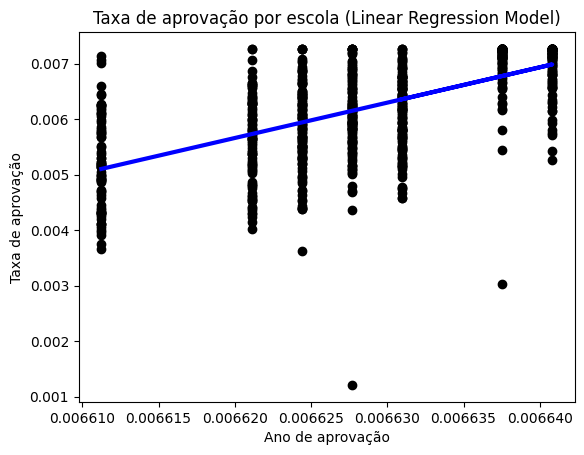

In [23]:
plt.scatter(x_df_test, y_df_test, color="black")
plt.plot(x_df_test, aprovados_y_pred, color="blue", linewidth=3)

plt.title('Taxa de aprovação por escola (Linear Regression Model)')
plt.ylabel("Taxa de aprovação")
plt.xlabel("Ano de aprovação")
plt.show()

# Test using SVM
##Creating a SVR model

In [20]:
model_SVR = svm.SVR()
model_SVR.fit(x_df_train,y_df_train)
Y_pred = model_SVR.predict(x_df_test)

print(mean_absolute_percentage_error(y_df_test, Y_pred))


0.35061766830706426


##Calculating model score

In [21]:
model_SVR.score(x_df_test, y_df_test)

-5.969366153688835

##plots

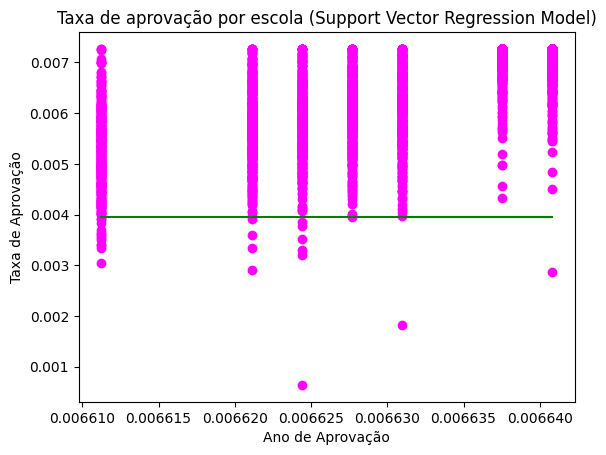

In [22]:
plt.scatter(x_df_train, y_df_train, color = 'magenta')
plt.plot(x_df_test, model_SVR.predict(x_df_test), color = 'green')
plt.title('Taxa de aprovação por escola (Support Vector Regression Model)')
plt.xlabel('Ano de Aprovação')
plt.ylabel('Taxa de Aprovação')
plt.show()

##Analyze SVR model to diferents Kernel

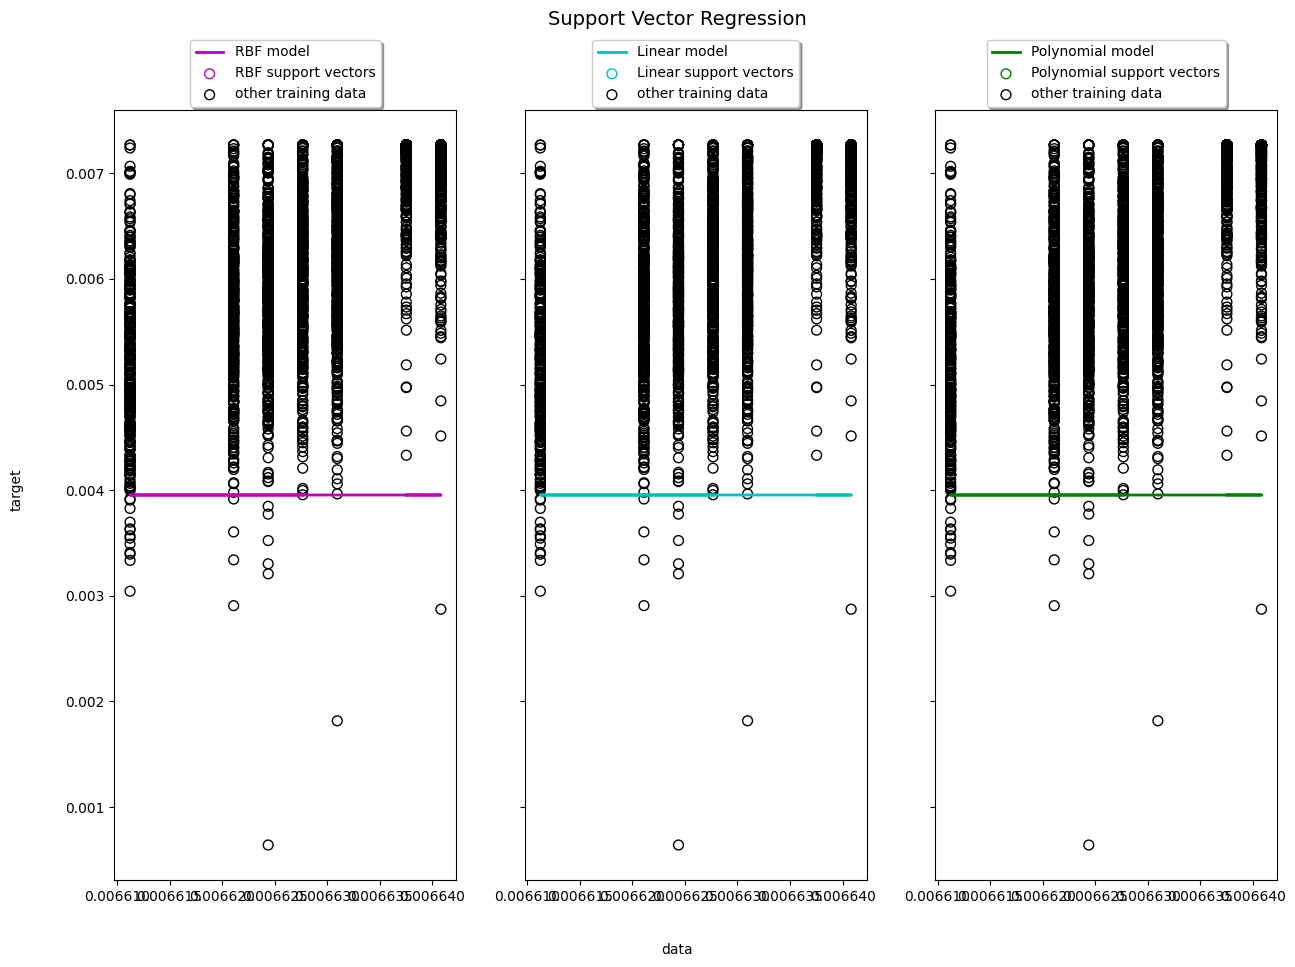

In [24]:
lw = 2
X = x_df_train
y = y_df_train

svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["RBF", "Linear", "Polynomial"]
model_color = ["m", "c", "g"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(
        X,
        svr.fit(X, y).predict(X),
        color=model_color[ix],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[svr.support_],
        y[svr.support_],
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[np.setdiff1d(np.arange(len(X)), svr.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr.support_)],
        facecolor="none",
        edgecolor="k",
        s=50,
        label="other training data",
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

### Random Forest

In [25]:
model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(x_df_train, y_df_train)
Y_pred = model_RFR.predict(x_df_test)

mean_absolute_percentage_error(y_df_test, Y_pred)


0.09493653055002968

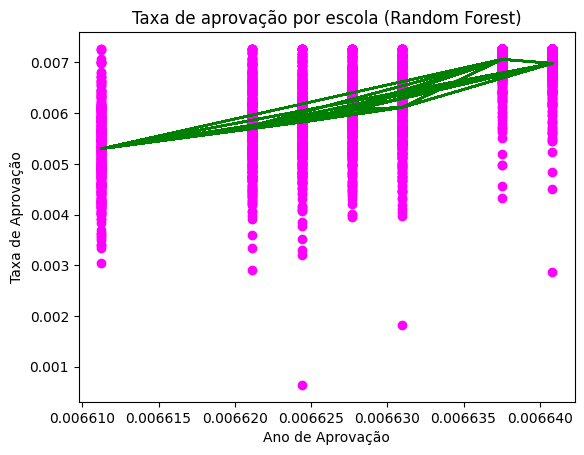

In [26]:
plt.scatter(x_df_train, y_df_train, color = 'magenta')
plt.plot(x_df_test, model_RFR.predict(x_df_test), color = 'green')
plt.title('Taxa de aprovação por escola (Random Forest)')
plt.xlabel('Ano de Aprovação')
plt.ylabel('Taxa de Aprovação')
plt.show()